# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

## Data Problem Definition



**Data Problem Definition:** The primary data problem is to build a predictive regression model that can accurately estimate the price of a used car based on its various features (e.g., make, model, year, mileage, condition, etc.). This involves identifying the most influential features affecting car prices and understanding their relationships, ultimately aiming to provide a data-driven approach for valuation.

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Here are some of the steps we can take to get familiar with our data and identify quality issues with data

**Load the dataset**: Load the dataset into a pandas DataFrame to begin exploration.

**Initial data inspection**: Examine the first few rows, data types, and non-null counts using functions like .head(), .info(), and .describe().

**Check for missing values**: Identify columns with missing values and quantify their extent using .isnull().sum().

**Identify duplicates**: Check for and quantify duplicate rows in the dataset using .duplicated().sum().

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [156]:
file_path = '/content/drive/MyDrive/Pract App2/vehicles.csv'
df = pd.read_csv(file_path)
display(df.head())

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [158]:
df.describe(percentiles=[
    0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
  )

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
5%,7.303150e+09,0.000000e+00,1998.000000,6.318000e+03
10%,7.304399e+09,5.000000e+02,2003.000000,1.493900e+04
20%,7.307115e+09,4.500000e+03,2007.000000,3.000000e+04
30%,7.309334e+09,6.995000e+03,2010.000000,4.608100e+04
40%,7.311118e+09,9.995000e+03,2012.000000,6.685960e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04


## Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Get rid of outliers in terms of pricing

Looking at mean price at 5%, 10%....99%; looks like we can keep the data where car price is between 5,000 - 100,000

In [159]:
df = df[(df['price']>500) & (df['price']<100_000)]
df.shape

(383068, 18)

In [160]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1170
manufacturer,15197
model,4434
condition,144650
cylinders,156175
fuel,2589
odometer,2114


###Data Cleanup:

Drop and Impute columns as needed

In [161]:
# Data Cleanup: Droping columns ('size' and 'VIN').
# These columns have large volume of missing data and
# VIN is a unique identification number hence not imputable.
# So it's good idea to drop these columns
columns_to_drop = ['size', 'VIN']

for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])

# Missing values in numerical columns like `year` and `odometer`
# Impute them using their respective medians.
# The median is a robust measure of central tendency, less sensitive to outliers,
# thus preserving the distribution of the existing data.
median_year = df['year'].median()
df['year'] = df['year'].fillna(median_year)

median_odometer = df['odometer'].median()
df['odometer'] = df['odometer'].fillna(median_odometer)

# Missing values in categorical columns such as `manufacturer`, `model`, `fuel`,
#`title_status`, `transmission`, `drive`, `type`, and `paint_color`
# were imputed using their respective modes (most frequent values).
# This is a common and effective method for categorical data imputation.
categorical_cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# For `condition` and `cylinders` columns, which had a significant number of
# missing values, the missing entries were imputed with a new 'Unknown' category.
# This approach retains the rows and explicitly marks the missingness as a
# distinct category, which can be informative.

df['condition'] = df['condition'].fillna('Unknown')
df['cylinders'] = df['cylinders'].fillna('Unknown')


### Data Cleanup: Verifying Missing Value Resolution

After all imputation and dropping strategies, a final check was performed to confirm that all columns in the DataFrame now have zero missing values, ensuring the dataset is clean for subsequent analysis.

In [162]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


### Check for duplicate records

In [163]:
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows found: {num_duplicates}")


Number of duplicate rows found: 0


### Histogram Plot distribution of price

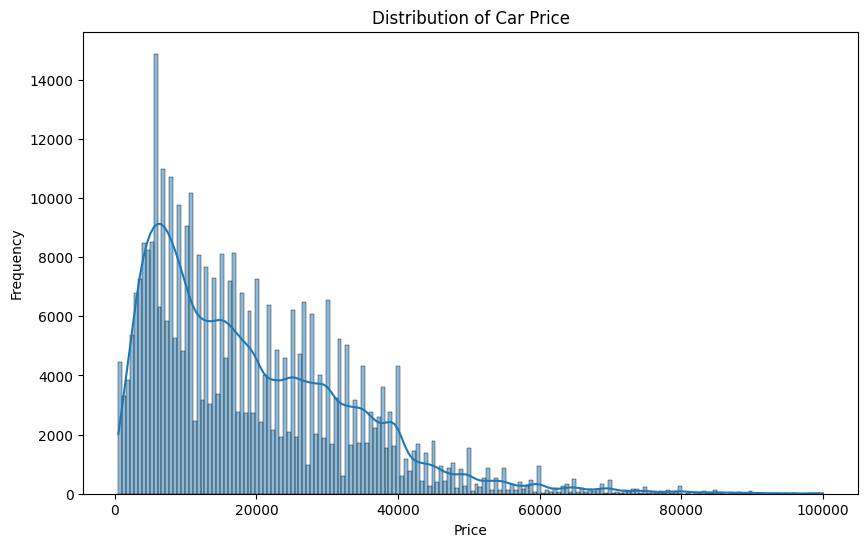

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Transformation Required?
Let's also try logarathimic value of price and see the distribution

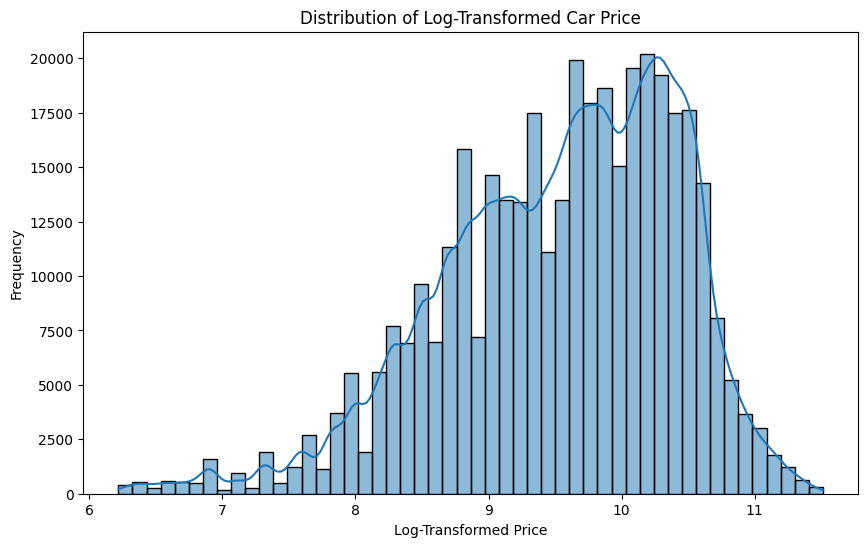

In [165]:
# Apply log1p transformation to the 'price' column
df['price_log'] = np.log1p(df['price'])

# Plot the distribution of the transformed 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Car Price')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

### Separate low cardinailty and high cardinality columns
### Split data into training and test sets. Apply appropriate encoding

In [166]:
!pip install category_encoders
import category_encoders as ce
categorical_columns = df.select_dtypes(include='object').columns.tolist()
low_cardinality_cols = []
high_cardinality_cols = []

# For columns with unique values < 50, collect them in low_cardinality_cols
# And for values > 50, collect them in high_Cardinality_cols
for col in categorical_columns:
    cardinality = df[col].nunique()
    if cardinality <= 50:
        low_cardinality_cols.append(col)
    else:
        high_cardinality_cols.append(col)

# Split data into training and test datasets
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop('id', axis = 1)
X_test = X_test.drop('id', axis = 1)

# Apply one-hot encoding to low cardinality columns
X_train_encoded = pd.get_dummies(X_train, columns=low_cardinality_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=low_cardinality_cols, drop_first=True)

# Align columns to ensure both train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)

# Fit the encoder on the training data (X_train_encoded) and transform it
X_train_encoded = target_encoder.fit_transform(X_train_encoded, y_train)

# Transform the test data using the fitted encoder
X_test_encoded = target_encoder.transform(X_test_encoded)

print("X_train_encoded shape after Target Encoding:", X_train_encoded.shape)
print("X_test_encoded shape after Target Encoding:", X_test_encoded.shape)


X_train_encoded shape after Target Encoding: (306454, 96)
X_test_encoded shape after Target Encoding: (76614, 96)


## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Linear Regression Model

In [167]:

from sklearn.linear_model import LinearRegression

# Initialize models
linear_reg_model = LinearRegression()

# Train Linear Regression model
print("Training Linear Regression model...")
linear_reg_model.fit(X_train_encoded, y_train)
print("Linear Regression model trained.")

Training Linear Regression model...
Linear Regression model trained.


In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store model performance metrics
model_performance = {}

# Evaluate Linear Regression
print("\n--- Evaluating Linear Regression ---")
linear_reg_preds = linear_reg_model.predict(X_test_encoded)
linear_reg_r2 = r2_score(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_preds))

model_performance['Linear Regression'] = {
    'R-squared': linear_reg_r2,
    'MAE': linear_reg_mae,
    'RMSE': linear_reg_rmse
}

print(f"R-squared: {linear_reg_r2:.4f}")
print(f"MAE: {linear_reg_mae:.4f}")
print(f"RMSE: {linear_reg_rmse:.4f}")


--- Evaluating Linear Regression ---
R-squared: 0.5694
MAE: 0.4022
RMSE: 0.5834


### Cross Validation for Linear Regression

In [169]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create custom scorers for MAE and RMSE
# For cross_val_score, higher values are better, so we use negative MAE and RMSE
neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

models = {
    'Linear Regression': linear_reg_model
}

cross_val_results = {}

for name, model in models.items():
    print(f"\n--- Performing Cross-Validation for {name} ---")

    # Evaluate R-squared
    r2_scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='r2', n_jobs=-1)
    print(f"R-squared: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

    # Evaluate MAE
    mae_scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring=neg_mae_scorer, n_jobs=-1)
    print(f"MAE: {-mae_scores.mean():.4f} (+/- {mae_scores.std():.4f})") # Invert back to positive MAE

    # Evaluate RMSE
    rmse_scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring=neg_rmse_scorer, n_jobs=-1)
    print(f"RMSE: {-rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})") # Invert back to positive RMSE

    cross_val_results[name] = {
        'R-squared_mean': r2_scores.mean(),
        'R-squared_std': r2_scores.std(),
        'MAE_mean': -mae_scores.mean(),
        'MAE_std': mae_scores.std(),
        'RMSE_mean': -rmse_scores.mean(),
        'RMSE_std': rmse_scores.std()
    }

print("\nCross-validation complete.")


--- Performing Cross-Validation for Linear Regression ---
R-squared: 0.5758 (+/- 0.0036)
MAE: 0.3946 (+/- 0.0010)
RMSE: 0.5763 (+/- 0.0030)

Cross-validation complete.


### Train Lasso Regression Model

Initialize and train a Lasso Regression model on the preprocessed training data (X_train_encoded and y_train).

In [170]:
from sklearn.linear_model import Lasso

# Initialize a Lasso Regression model
# Starting with a default alpha, or can tune later
lasso_reg_model = Lasso(alpha=0.1, random_state=42)

# Train Lasso Regression model
print("Training Lasso Regression model...")
lasso_reg_model.fit(X_train_encoded, y_train)
print("Lasso Regression model trained.")

Training Lasso Regression model...
Lasso Regression model trained.


In [171]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store model performance metrics (re-initialize if not available globally)
if 'model_performance' not in locals():
    model_performance = {}

# Evaluate Lasso Regression
print("\n--- Evaluating Lasso Regression ---")
lasso_reg_preds = lasso_reg_model.predict(X_test_encoded)
lasso_reg_r2 = r2_score(y_test, lasso_reg_preds)
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_preds)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_preds))

model_performance['Lasso Regression'] = {
    'R-squared': lasso_reg_r2,
    'MAE': lasso_reg_mae,
    'RMSE': lasso_reg_rmse
}

print(f"R-squared (Lasso): {lasso_reg_r2:.4f}")
print(f"MAE (Lasso): {lasso_reg_mae:.4f}")
print(f"RMSE (Lasso): {lasso_reg_rmse:.4f}")


--- Evaluating Lasso Regression ---
R-squared (Lasso): 0.4510
MAE (Lasso): 0.4624
RMSE (Lasso): 0.6588


### Cross-Validation for Lasso Regression

The Lasso Regression model has been trained and its test set performance evaluated. Now, to provide a more robust assessment and complete the subtask, I need to perform KFold cross-validation on the Lasso model, similar to how it was done for the initial Linear Regression model. This will provide insights into its stability and generalization capabilities across different subsets of the training data.

In [172]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create custom scorers for MAE and RMSE
neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation for Lasso Regression
print("\n--- Performing Cross-Validation for Lasso Regression ---")

# Evaluate R-squared
r2_scores_lasso = cross_val_score(lasso_reg_model, X_train_encoded, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f"R-squared (Lasso CV): {r2_scores_lasso.mean():.4f} (+/- {r2_scores_lasso.std():.4f})")

# Evaluate MAE
mae_scores_lasso = cross_val_score(lasso_reg_model, X_train_encoded, y_train, cv=kf, scoring=neg_mae_scorer, n_jobs=-1)
print(f"MAE (Lasso CV): {-mae_scores_lasso.mean():.4f} (+/- {mae_scores_lasso.std():.4f})") # Invert back to positive MAE

# Evaluate RMSE
rmse_scores_lasso = cross_val_score(lasso_reg_model, X_train_encoded, y_train, cv=kf, scoring=neg_rmse_scorer, n_jobs=-1)
print(f"RMSE (Lasso CV): {-rmse_scores_lasso.mean():.4f} (+/- {rmse_scores_lasso.std():.4f})") # Invert back to positive RMSE

# Store cross-validation results
# Ensure cross_val_results dictionary is defined
if 'cross_val_results' not in locals():
    cross_val_results = {}
cross_val_results['Lasso Regression'] = {
    'R-squared_mean': r2_scores_lasso.mean(),
    'R-squared_std': r2_scores_lasso.std(),
    'MAE_mean': -mae_scores_lasso.mean(),
    'MAE_std': mae_scores_lasso.std(),
    'RMSE_mean': -rmse_scores_lasso.mean(),
    'RMSE_std': rmse_scores_lasso.std()
}

print("Lasso Regression cross-validation complete.")


--- Performing Cross-Validation for Lasso Regression ---
R-squared (Lasso CV): 0.4583 (+/- 0.0035)
MAE (Lasso CV): 0.4552 (+/- 0.0015)
RMSE (Lasso CV): 0.6512 (+/- 0.0027)
Lasso Regression cross-validation complete.


### Visualize All Model Predictions (Actual vs. Predicted)

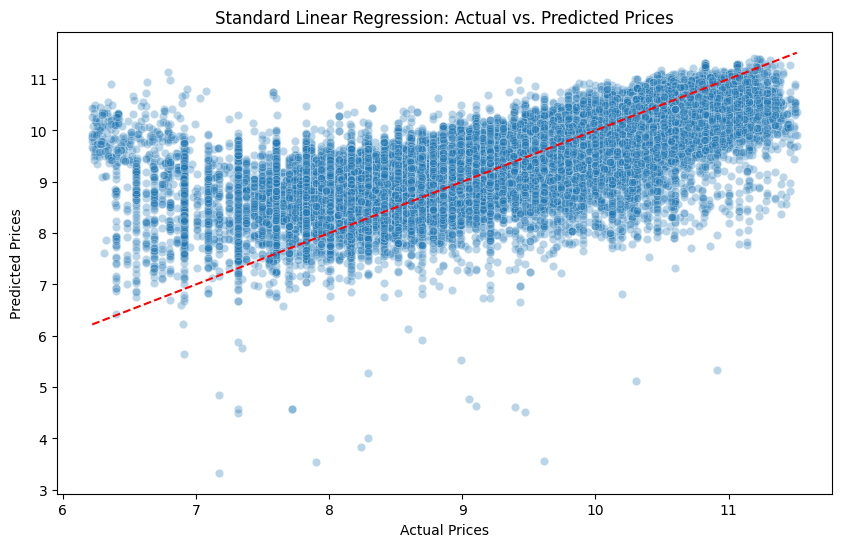

In [173]:
# Plotting Actual vs. Predicted values for Standard Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=linear_reg_preds, alpha=0.3)
plt.title('Standard Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.show()

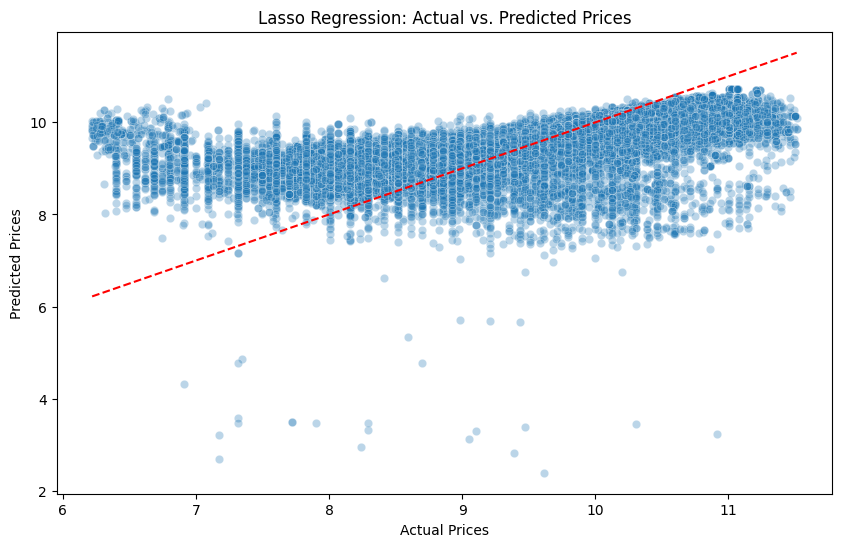

In [174]:
# Plotting Actual vs. Predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lasso_reg_preds, alpha=0.3)
plt.title('Lasso Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.show()

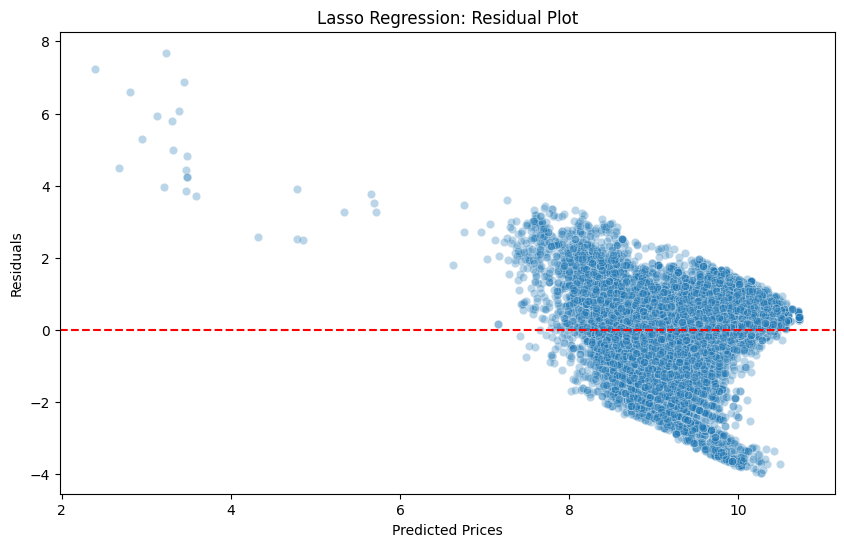

In [175]:
# Plotting Residuals for Lasso Regression
lasso_residuals = y_test - lasso_reg_preds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lasso_reg_preds, y=lasso_residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Lasso Regression: Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

### Apply Inverse Transformation to Linear and Lasso Regression models
And compare model performances

In [176]:
# Now, retrieve the original price values for the y_test indices from this clean df_no_fe
# This y_test (from the kernel) should correspond to the split before engineered features
y_test_original_no_fe = df.loc[y_test.index, 'price']

# Inverse transform predictions from Linear Regression model (without engineered features)
linear_reg_preds_original_scale_no_fe = np.expm1(linear_reg_preds)
linear_reg_preds_original_scale_no_fe[linear_reg_preds_original_scale_no_fe < 0] = 0

# Calculate evaluation metrics for Linear Regression on original scale (without engineered features)
linear_reg_r2_original_scale_no_fe = r2_score(y_test_original_no_fe, linear_reg_preds_original_scale_no_fe)
linear_reg_mae_original_scale_no_fe = mean_absolute_error(y_test_original_no_fe, linear_reg_preds_original_scale_no_fe)
linear_reg_rmse_original_scale_no_fe = np.sqrt(mean_squared_error(y_test_original_no_fe, linear_reg_preds_original_scale_no_fe))

# Update model_performance dictionary
if 'model_performance' not in locals():
    model_performance = {}
model_performance['Linear Regression (Original Scale)'] = {
    'R-squared': linear_reg_r2_original_scale_no_fe,
    'MAE': linear_reg_mae_original_scale_no_fe,
    'RMSE': linear_reg_rmse_original_scale_no_fe
}

# Inverse transform predictions from Lasso Regression model (without engineered features)
lasso_reg_preds_original_scale_no_fe = np.expm1(lasso_reg_preds)
lasso_reg_preds_original_scale_no_fe[lasso_reg_preds_original_scale_no_fe < 0] = 0

# Calculate evaluation metrics for Lasso Regression on original scale (without engineered features)
lasso_reg_r2_original_scale_no_fe = r2_score(y_test_original_no_fe, lasso_reg_preds_original_scale_no_fe)
lasso_reg_mae_original_scale_no_fe = mean_absolute_error(y_test_original_no_fe, lasso_reg_preds_original_scale_no_fe)
lasso_reg_rmse_original_scale_no_fe = np.sqrt(mean_squared_error(y_test_original_no_fe, lasso_reg_preds_original_scale_no_fe))

# Update model_performance dictionary
model_performance['Lasso Regression (Original Scale)'] = {
    'R-squared': lasso_reg_r2_original_scale_no_fe,
    'MAE': lasso_reg_mae_original_scale_no_fe,
    'RMSE': lasso_reg_rmse_original_scale_no_fe
}

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Compare Model Performance on logarathimic scale

Present a comparison of the evaluation metrics (R-squared, MAE, RMSE) for standard Linear Regression model and Lasso Regression model.

In [177]:
# Update the comparison DataFrame
performance_data = []
for model_name, metrics in model_performance.items():
    performance_data.append({
        'Model': model_name,
        'R-squared': metrics['R-squared'],
        'MAE': metrics['MAE'],
        'RMSE': metrics['RMSE']
    })
comparison_df = pd.DataFrame(performance_data)
display(comparison_df)

,Model,R-squared,MAE,RMSE
0,Linear Regression,0.569422,0.402241,0.583400
1,Lasso Regression,0.451003,0.462387,0.658757
2,Linear Regression (Original Scale),0.546230,6217.272001,9725.213667
3,Lasso Regression (Original Scale),0.388358,7119.203359,11290.931527


### From Lasso Model, see which features have coeff non-zero.
Essentially, those are the features driving the prices

In [178]:
sorted(zip(X_train_encoded.columns, lasso_reg_model.coef_), key=lambda x: abs(x[1]), reverse=True)

[('model', np.float64(0.6170375242343271)),
 ('year', np.float64(0.026227358358339167)),
 ('odometer', np.float64(-5.339815042578471e-07)),
 ('condition_excellent', np.float64(-0.0)),
 ('condition_fair', np.float64(-0.0)),
 ('condition_good', np.float64(-0.0)),
 ('condition_like new', np.float64(0.0)),
 ('condition_new', np.float64(0.0)),
 ('condition_salvage', np.float64(-0.0)),
 ('cylinders_12 cylinders', np.float64(0.0)),
 ('cylinders_3 cylinders', np.float64(-0.0)),
 ('cylinders_4 cylinders', np.float64(-0.0)),
 ('cylinders_5 cylinders', np.float64(-0.0)),
 ('cylinders_6 cylinders', np.float64(-0.0)),
 ('cylinders_8 cylinders', np.float64(0.0)),
 ('cylinders_Unknown', np.float64(0.0)),
 ('cylinders_other', np.float64(0.0)),
 ('drive_fwd', np.float64(-0.0)),
 ('drive_rwd', np.float64(0.0)),
 ('fuel_electric', np.float64(0.0)),
 ('fuel_gas', np.float64(-0.0)),
 ('fuel_hybrid', np.float64(-0.0)),
 ('fuel_other', np.float64(0.0)),
 ('manufacturer_alfa-romeo', np.float64(0.0)),
 ('manuf

### **Even though, we got the results from Linear Regression and Lasso Regression models, let's try some feature engineering and see if that improves results**

## Modeling with Engineered Features

### Create Car Age Feature

Derive a new numerical feature 'car_age' from the 'year' column. This will represent the age of the car (e.g., current_year - car_year).

In [179]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Create 'car_age' feature
df['car_age'] = current_year - df['year']

# Ensure car_age is not negative (e.g., for future years data entry errors)
df['car_age'] = df['car_age'].apply(lambda x: max(x, 0))

# Handle zero car_age values by replacing them with 1
df['car_age'] = df['car_age'].replace(0, 1)

print("New feature 'car_age' created and processed.")
display(df[['year', 'car_age']].head())

New feature 'car_age' created and processed.


,year,car_age
0,2013.0,12.0
1,2013.0,12.0
2,2013.0,12.0
3,2013.0,12.0
4,2013.0,12.0


### Create Mileage per year Feature

Derive a new numerical feature 'mileage_per_year' from the 'odometer' and 'car_age' column. This will represent mileage per year (e.g., odometer/car_age).


In [180]:
df['mileage_per_year'] = df['odometer'] / df['car_age']

print("New feature 'mileage_per_year' created.")
display(df[['odometer', 'car_age', 'mileage_per_year']].head())

New feature 'mileage_per_year' created.


,odometer,car_age,mileage_per_year
0,87805.0,12.0,7317.083333
1,87805.0,12.0,7317.083333
2,87805.0,12.0,7317.083333
3,87805.0,12.0,7317.083333
4,87805.0,12.0,7317.083333


### Create Luxury brand feature
I will now generate a new feature named `is_luxury`, a binary indicator (0/1) showing whether the car's manufacturer is considered a luxury brand. This feature will be added to the DataFrame `df`.

In [181]:
luxury_brands = [
    'audi', 'bmw', 'mercedes-benz', 'lexus', 'tesla', 'porsche', 'cadillac',
    'infiniti', 'acura', 'land rover', 'jaguar', 'alfa-romeo', 'volvo',
    'mini', 'ferrari', 'aston-martin', 'morgan'
]

df['is_luxury'] = df['manufacturer'].apply(lambda x: 1 if x in luxury_brands else 0)

print("New feature 'is_luxury' created.")
display(df['is_luxury'].value_counts())

New feature 'is_luxury' created.


,count
is_luxury,
0,318471
1,64597


### Create Car Age and Odometer Interaction Feature

Create an interaction feature by multiplying 'car_age' and 'odometer'.

In [182]:
df['age_odometer_interaction'] = df['car_age'] * df['odometer']

print("New feature 'age_odometer_interaction' created.")
display(df[['car_age', 'odometer', 'age_odometer_interaction']].head())

New feature 'age_odometer_interaction' created.


,car_age,odometer,age_odometer_interaction
0,12.0,87805.0,1053660.0
1,12.0,87805.0,1053660.0
2,12.0,87805.0,1053660.0
3,12.0,87805.0,1053660.0
4,12.0,87805.0,1053660.0


### Re-prepare Data with New Features and Log-Transformed Price

Re-run the data cleaning, splitting, and encoding steps, ensuring the newly engineered features ('car_age', 'mileage_per_year') are included and 'price_log' is set as the target variable.


In [183]:
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (383068, 19)
y shape: (383068,)


### Split the data into training and test datasets

In [184]:
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Split the updated X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape before dropping id:", X_train.shape)
print("X_test shape before dropping id:", X_test.shape)

# Drop the 'id' column from both training and testing feature sets
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)

print("X_train shape after dropping id:", X_train.shape)
print("X_test shape after dropping id:", X_test.shape)

# Apply one-hot encoding to low cardinality columns
X_train_encoded = pd.get_dummies(X_train, columns=low_cardinality_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=low_cardinality_cols, drop_first=True)

# Align columns to ensure both train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

print("X_train_encoded shape after One-Hot Encoding:", X_train_encoded.shape)
print("X_test_encoded shape after One-Hot Encoding:", X_test_encoded.shape)

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)

# Fit the encoder on the training data (X_train_encoded) and transform it
X_train_encoded = target_encoder.fit_transform(X_train_encoded, y_train)

# Transform the test data using the fitted encoder
X_test_encoded = target_encoder.transform(X_test_encoded)

print("X_train_encoded shape after Target Encoding:", X_train_encoded.shape)
print("X_test_encoded shape after Target Encoding:", X_test_encoded.shape)


X_train shape before dropping id: (306454, 19)
X_test shape before dropping id: (76614, 19)
X_train shape after dropping id: (306454, 18)
X_test shape after dropping id: (76614, 18)
X_train_encoded shape after One-Hot Encoding: (306454, 100)
X_test_encoded shape after One-Hot Encoding: (76614, 100)
X_train_encoded shape after Target Encoding: (306454, 100)
X_test_encoded shape after Target Encoding: (76614, 100)


### Re-train and Evaluate Linear Regression Models

Re-train the Standard Linear Regression and Lasso Regression models using the updated dataset with engineered features and `price_log` as the target. Evaluate their performance on the test set and update the comparison table.


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Linear Regression model
linear_reg_model_new = LinearRegression()

# Train Linear Regression model with new features
print("Training Linear Regression model with engineered features...")
linear_reg_model_new.fit(X_train_encoded, y_train)
print("Linear Regression model with engineered features trained.")

# Predict on the test set
linear_reg_preds_new = linear_reg_model_new.predict(X_test_encoded)

# Calculate evaluation metrics
linear_reg_r2_new = r2_score(y_test, linear_reg_preds_new)
linear_reg_mae_new = mean_absolute_error(y_test, linear_reg_preds_new)
linear_reg_rmse_new = np.sqrt(mean_squared_error(y_test, linear_reg_preds_new))

# Update model_performance dictionary
if 'model_performance' not in locals():
    model_performance = {}
model_performance['Linear Regression with Engineered Features'] = {
    'R-squared': linear_reg_r2_new,
    'MAE': linear_reg_mae_new,
    'RMSE': linear_reg_rmse_new
}

print("\n--- Evaluation for Linear Regression with Engineered Features ---")
print(f"R-squared: {linear_reg_r2_new:.4f}")
print(f"MAE: {linear_reg_mae_new:.4f}")
print(f"RMSE: {linear_reg_rmse_new:.4f}")

Training Linear Regression model with engineered features...
Linear Regression model with engineered features trained.

--- Evaluation for Linear Regression with Engineered Features ---
R-squared: 0.5857
MAE: 0.3879
RMSE: 0.5722


### Cross-validation for Linear Regression Model

In [186]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create custom scorers for MAE and RMSE
neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation for Linear Regression with Engineered Features
print("\n--- Performing Cross-Validation for Linear Regression with Engineered Features ---")

# Evaluate R-squared
r2_scores_lr_new_cv = cross_val_score(linear_reg_model_new, X_train_encoded, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f"R-squared (LR New CV): {r2_scores_lr_new_cv.mean():.4f} (+/- {r2_scores_lr_new_cv.std():.4f})")

# Evaluate MAE
mae_scores_lr_new_cv = cross_val_score(linear_reg_model_new, X_train_encoded, y_train, cv=kf, scoring=neg_mae_scorer, n_jobs=-1)
print(f"MAE (LR New CV): {-mae_scores_lr_new_cv.mean():.4f} (+/- {mae_scores_lr_new_cv.std():.4f})") # Invert back to positive MAE

# Evaluate RMSE
rmse_scores_lr_new_cv = cross_val_score(linear_reg_model_new, X_train_encoded, y_train, cv=kf, scoring=neg_rmse_scorer, n_jobs=-1)
print(f"RMSE (LR New CV): {-rmse_scores_lr_new_cv.mean():.4f} (+/- {-rmse_scores_lr_new_cv.std():.4f})") # Invert back to positive RMSE

# Store cross-validation results
if 'cross_val_results' not in locals():
    cross_val_results = {}
cross_val_results['Linear Regression with Engineered Features (CV)'] = {
    'R-squared_mean': r2_scores_lr_new_cv.mean(),
    'R-squared_std': r2_scores_lr_new_cv.std(),
    'MAE_mean': -mae_scores_lr_new_cv.mean(),
    'MAE_std': mae_scores_lr_new_cv.std(),
    'RMSE_mean': -rmse_scores_lr_new_cv.mean(),
    'RMSE_std': rmse_scores_lr_new_cv.std()
}


--- Performing Cross-Validation for Linear Regression with Engineered Features ---
R-squared (LR New CV): 0.5840 (+/- 0.0090)
MAE (LR New CV): 0.3806 (+/- 0.0016)
RMSE (LR New CV): 0.5707 (+/- -0.0058)


### Lasso model with Engineered features

In [187]:
from sklearn.linear_model import Lasso

# Initialize a Lasso Regression model
# Using alpha=0.1 as suggested in the instruction
lasso_reg_model_new = Lasso(alpha=0.1, random_state=42)

# Train Lasso Regression model with new features
print("Training Lasso Regression model with engineered features...")
lasso_reg_model_new.fit(X_train_encoded, y_train)
print("Lasso Regression model with engineered features trained.")

Training Lasso Regression model with engineered features...
Lasso Regression model with engineered features trained.


### Lasso model performance

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
lasso_reg_preds_new = lasso_reg_model_new.predict(X_test_encoded)

# Calculate evaluation metrics
lasso_reg_r2_new = r2_score(y_test, lasso_reg_preds_new)
lasso_reg_mae_new = mean_absolute_error(y_test, lasso_reg_preds_new)
lasso_reg_rmse_new = np.sqrt(mean_squared_error(y_test, lasso_reg_preds_new))

# Update model_performance dictionary
if 'model_performance' not in locals():
    model_performance = {}
model_performance['Lasso Regression with Engineered Features'] = {
    'R-squared': lasso_reg_r2_new,
    'MAE': lasso_reg_mae_new,
    'RMSE': lasso_reg_rmse_new
}

print("\n--- Evaluation for Lasso Regression with Engineered Features ---")
print(f"R-squared: {lasso_reg_r2_new:.4f}")
print(f"MAE: {lasso_reg_mae_new:.4f}")
print(f"RMSE: {lasso_reg_rmse_new:.4f}")


--- Evaluation for Lasso Regression with Engineered Features ---
R-squared: 0.4697
MAE: 0.4481
RMSE: 0.6475


### Cross-validation for Lasso model

In [189]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create custom scorers for MAE and RMSE
neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
neg_rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation for Lasso Regression with Engineered Features
print("\n--- Performing Cross-Validation for Lasso Regression with Engineered Features ---")

# Evaluate R-squared
r2_scores_lasso_new_cv = cross_val_score(lasso_reg_model_new, X_train_encoded, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f"R-squared (Lasso New CV): {r2_scores_lasso_new_cv.mean():.4f} (+/- {r2_scores_lasso_new_cv.std():.4f})")

# Evaluate MAE
mae_scores_lasso_new_cv = cross_val_score(lasso_reg_model_new, X_train_encoded, y_train, cv=kf, scoring=neg_mae_scorer, n_jobs=-1)
print(f"MAE (Lasso New CV): {-mae_scores_lasso_new_cv.mean():.4f} (+/- {mae_scores_lasso_new_cv.std():.4f})") # Invert back to positive MAE

# Evaluate RMSE
rmse_scores_lasso_new_cv = cross_val_score(lasso_reg_model_new, X_train_encoded, y_train, cv=kf, scoring=neg_rmse_scorer, n_jobs=-1)
print(f"RMSE (Lasso New CV): {-rmse_scores_lasso_new_cv.mean():.4f} (+/- {rmse_scores_lasso_new_cv.std():.4f})") # Invert back to positive RMSE

# Store cross-validation results
if 'cross_val_results' not in locals():
    cross_val_results = {}
cross_val_results['Lasso Regression with Engineered Features (CV)'] = {
    'R-squared_mean': r2_scores_lasso_new_cv.mean(),
    'R-squared_std': r2_scores_lasso_new_cv.std(),
    'MAE_mean': -mae_scores_lasso_new_cv.mean(),
    'MAE_std': mae_scores_lasso_new_cv.std(),
    'RMSE_mean': -rmse_scores_lasso_new_cv.mean(),
    'RMSE_std': rmse_scores_lasso_new_cv.std()
}

print("Lasso Regression with Engineered Features cross-validation complete.")


--- Performing Cross-Validation for Lasso Regression with Engineered Features ---
R-squared (Lasso New CV): 0.4635 (+/- 0.0175)
MAE (Lasso New CV): 0.4416 (+/- 0.0018)
RMSE (Lasso New CV): 0.6481 (+/- 0.0101)
Lasso Regression with Engineered Features cross-validation complete.


### Updated model performance

In [190]:
print("\n--- Updated Model Performance ---")
for model_name, metrics in model_performance.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

print("\n--- Updated Cross-Validation Results ---")
for model_name, metrics in cross_val_results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


--- Updated Model Performance ---

Model: Linear Regression
  R-squared: 0.5694
  MAE: 0.4022
  RMSE: 0.5834

Model: Lasso Regression
  R-squared: 0.4510
  MAE: 0.4624
  RMSE: 0.6588

Model: Linear Regression (Original Scale)
  R-squared: 0.5462
  MAE: 6217.2720
  RMSE: 9725.2137

Model: Lasso Regression (Original Scale)
  R-squared: 0.3884
  MAE: 7119.2034
  RMSE: 11290.9315

Model: Linear Regression with Engineered Features
  R-squared: 0.5857
  MAE: 0.3879
  RMSE: 0.5722

Model: Lasso Regression with Engineered Features
  R-squared: 0.4697
  MAE: 0.4481
  RMSE: 0.6475

--- Updated Cross-Validation Results ---

Model: Linear Regression
  R-squared_mean: 0.5758
  R-squared_std: 0.0036
  MAE_mean: 0.3946
  MAE_std: 0.0010
  RMSE_mean: 0.5763
  RMSE_std: 0.0030

Model: Lasso Regression
  R-squared_mean: 0.4583
  R-squared_std: 0.0035
  MAE_mean: 0.4552
  MAE_std: 0.0015
  RMSE_mean: 0.6512
  RMSE_std: 0.0027

Model: Linear Regression with Engineered Features (CV)
  R-squared_mean: 0.58

### Visualizations

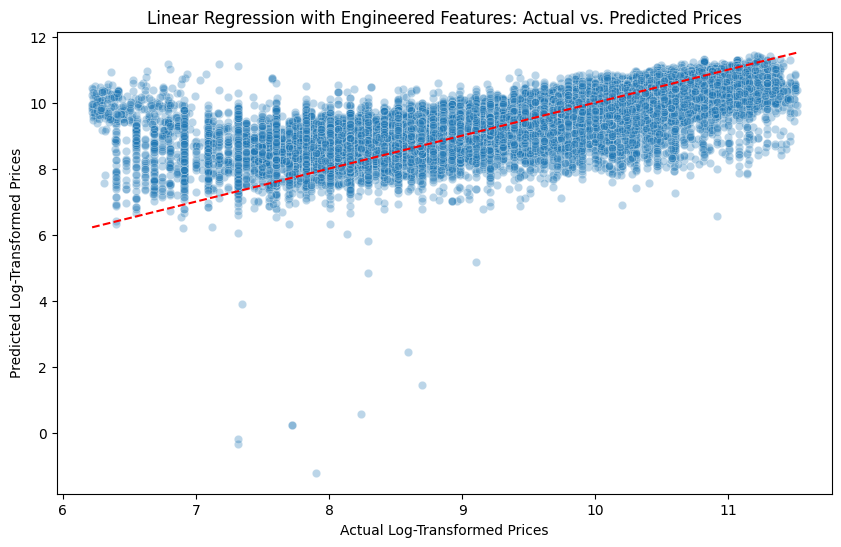

In [191]:
# Plotting Actual vs. Predicted values for Linear Regression with Engineered Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=linear_reg_preds_new, alpha=0.3)
plt.title('Linear Regression with Engineered Features: Actual vs. Predicted Prices')
plt.xlabel('Actual Log-Transformed Prices')
plt.ylabel('Predicted Log-Transformed Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.show()

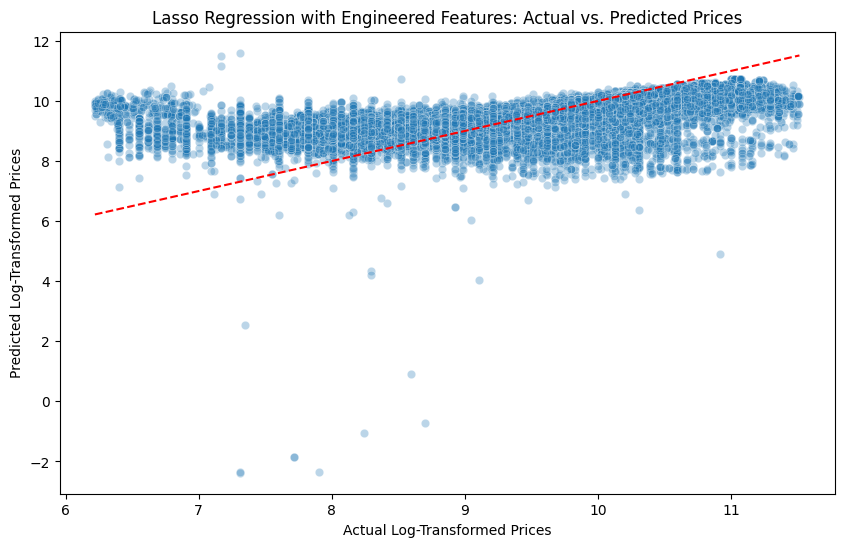

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting Actual vs. Predicted values for Lasso Regression with Engineered Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lasso_reg_preds_new, alpha=0.3)
plt.title('Lasso Regression with Engineered Features: Actual vs. Predicted Prices')
plt.xlabel('Actual Log-Transformed Prices')
plt.ylabel('Predicted Log-Transformed Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.show()

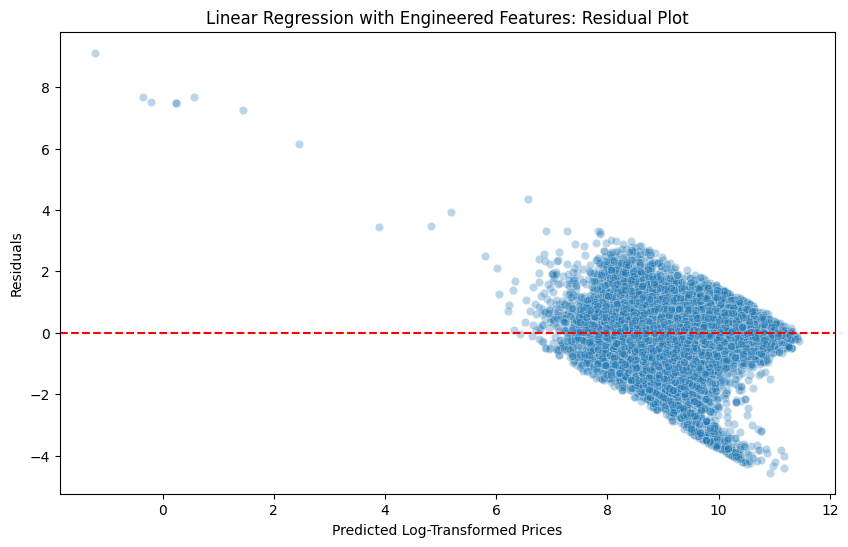

In [193]:
# Plotting Residuals for Linear Regression with Engineered Features
linear_reg_residuals_new = y_test - linear_reg_preds_new
plt.figure(figsize=(10, 6))
sns.scatterplot(x=linear_reg_preds_new, y=linear_reg_residuals_new, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression with Engineered Features: Residual Plot')
plt.xlabel('Predicted Log-Transformed Prices')
plt.ylabel('Residuals')
plt.show()

### Inverse Transform and Evaluate Predictions

Inverse transform the `price_log` predictions from Linear Regression and Lasso Regression models back to the original `price` scale using `np.expm1`. Then, calculate R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) using these inverse-transformed predictions against the original `price` values.


In [194]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Retrieve original price values for y_test indices
y_test_original = df.loc[y_test.index, 'price']

# Ensure y_test_original is aligned with y_test
# y_test_original should be indexed the same as y_test

# 2. Apply inverse transform (np.expm1) to linear_reg_preds_new
linear_reg_preds_original_scale = np.expm1(linear_reg_preds_new)

# Handle potential negative predictions by setting them to 0 if they arise from expm1 on very low log values
linear_reg_preds_original_scale[linear_reg_preds_original_scale < 0] = 0

# 3. Calculate evaluation metrics for Linear Regression on original scale
linear_reg_r2_original_scale = r2_score(y_test_original, linear_reg_preds_original_scale)
linear_reg_mae_original_scale = mean_absolute_error(y_test_original, linear_reg_preds_original_scale)
linear_reg_rmse_original_scale = np.sqrt(mean_squared_error(y_test_original, linear_reg_preds_original_scale))

# Update model_performance dictionary
model_performance['Linear Regression with Engineered Features (Original Scale)'] = {
    'R-squared': linear_reg_r2_original_scale,
    'MAE': linear_reg_mae_original_scale,
    'RMSE': linear_reg_rmse_original_scale
}

print("--- Evaluation for Linear Regression with Engineered Features (Original Scale) ---")
print(f"R-squared: {linear_reg_r2_original_scale:.4f}")
print(f"MAE: {linear_reg_mae_original_scale:.4f}")
print(f"RMSE: {linear_reg_rmse_original_scale:.4f}")

--- Evaluation for Linear Regression with Engineered Features (Original Scale) ---
R-squared: 0.5699
MAE: 5994.5108
RMSE: 9468.3208


### Apply inverse tranform to Lasso model

In [195]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 4. Apply inverse transform (np.expm1) to lasso_reg_preds_new
lasso_reg_preds_original_scale = np.expm1(lasso_reg_preds_new)

# Handle potential negative predictions by setting them to 0 if they arise from expm1 on very low log values
lasso_reg_preds_original_scale[lasso_reg_preds_original_scale < 0] = 0

# 5. Calculate evaluation metrics for Lasso Regression on original scale
lasso_reg_r2_original_scale = r2_score(y_test_original, lasso_reg_preds_original_scale)
lasso_reg_mae_original_scale = mean_absolute_error(y_test_original, lasso_reg_preds_original_scale)
lasso_reg_rmse_original_scale = np.sqrt(mean_squared_error(y_test_original, lasso_reg_preds_original_scale))

# Update model_performance dictionary
model_performance['Lasso Regression with Engineered Features (Original Scale)'] = {
    'R-squared': lasso_reg_r2_original_scale,
    'MAE': lasso_reg_mae_original_scale,
    'RMSE': lasso_reg_rmse_original_scale
}

print("\n--- Evaluation for Lasso Regression with Engineered Features (Original Scale) ---")
print(f"R-squared: {lasso_reg_r2_original_scale:.4f}")
print(f"MAE: {lasso_reg_mae_original_scale:.4f}")
print(f"RMSE: {lasso_reg_rmse_original_scale:.4f}")


--- Evaluation for Lasso Regression with Engineered Features (Original Scale) ---
R-squared: 0.4068
MAE: 6927.9292
RMSE: 11119.8005


## Evaluation - Engineered Models

### Compare models performances

In [196]:
import pandas as pd

# Create a dictionary to hold the performance metrics for comparison
performance_data = []
for model_name, metrics in model_performance.items():
    performance_data.append({
        'Model': model_name,
        'R-squared': metrics['R-squared'],
        'MAE': metrics['MAE'],
        'RMSE': metrics['RMSE']
    })

# Create a DataFrame from the performance data
comparison_df = pd.DataFrame(performance_data)

# Display the comparison DataFrame
display(comparison_df)

,Model,R-squared,MAE,RMSE
0,Linear Regression,0.569422,0.402241,0.583400
1,Lasso Regression,0.451003,0.462387,0.658757
2,Linear Regression (Original Scale),0.546230,6217.272001,9725.213667
3,Lasso Regression (Original Scale),0.388358,7119.203359,11290.931527
4,Linear Regression with Engineered Features,0.585745,0.387863,0.572235
5,Lasso Regression with Engineered Features,0.469655,0.448113,0.647470
6,Linear Regression with Engineered Features (Or...,0.569886,5994.510809,9468.320759
7,Lasso Regression with Engineered Features (Ori...,0.406758,6927.929168,11119.800542


### Lasso Model, Get non-zero Coeff

In [197]:
sorted(zip(X_train_encoded.columns, lasso_reg_model.coef_), key=lambda x: abs(x[1]), reverse=True)

[('manufacturer_toyota', np.float64(0.6170375242343271)),
 ('type_sedan', np.float64(0.026227358358339167)),
 ('manufacturer_volkswagen', np.float64(-5.339815042578471e-07)),
 ('age_odometer_interaction', np.float64(-0.0)),
 ('car_age', np.float64(-0.0)),
 ('condition_excellent', np.float64(-0.0)),
 ('condition_fair', np.float64(0.0)),
 ('condition_good', np.float64(0.0)),
 ('condition_like new', np.float64(-0.0)),
 ('condition_new', np.float64(0.0)),
 ('condition_salvage', np.float64(-0.0)),
 ('cylinders_12 cylinders', np.float64(-0.0)),
 ('cylinders_3 cylinders', np.float64(-0.0)),
 ('cylinders_4 cylinders', np.float64(-0.0)),
 ('cylinders_5 cylinders', np.float64(0.0)),
 ('cylinders_6 cylinders', np.float64(0.0)),
 ('cylinders_8 cylinders', np.float64(0.0)),
 ('cylinders_Unknown', np.float64(-0.0)),
 ('cylinders_other', np.float64(0.0)),
 ('drive_fwd', np.float64(0.0)),
 ('drive_rwd', np.float64(-0.0)),
 ('fuel_electric', np.float64(-0.0)),
 ('fuel_gas', np.float64(0.0)),
 ('fuel_hy

# Project Summary: What Drives the Price of a Car?
This project aimed to understand the key drivers of used car prices using a dataset of 426,000 car listings, ultimately providing recommendations to a used car dealership on consumer valuation.

1. Business & Data Understanding
Business Problem: Identify factors influencing used car prices to help a dealership fine-tune its inventory.
Data Problem: Build a predictive regression model to estimate car prices based on various features.
Initial Data Exploration: Loaded the dataset, inspected data types (df.info()), and examined descriptive statistics (df.describe()).

2. Data Preparation & Cleaning
Outlier Handling: Initial filtering of car prices between $500 and $100,000 was performed, reducing the dataset size. Note: Further price filtering was implicitly handled by the logarithmic transformation.
Missing Value Imputation:
Columns with high missingness (size, VIN) were dropped.
Numerical columns (year, odometer) were imputed with their medians.
Categorical columns were imputed with their modes or 'Unknown' (for condition, cylinders).
Duplicate Check: Confirmed no duplicate rows.
Target Variable Transformation: Before removing outliers (<500 and >1000), price column was highly skewed. But after removing those outliers, histogram showed much better results. Price column then was transformed using np.log1p(price) to create price_log for modeling, aiming for a more normal distribution.

3. Feature Engineering Stages

Basic Engineered Features

car_age: Derived as current_year - year, handling non-negative values.
mileage_per_year: Calculated as odometer / car_age.
is_luxury: Binary (0/1) indicator based on manufacturer.
age_odometer_interaction: Product of car_age and odometer.

4. Data Splitting and Encoding
The dataset was split into training and testing sets (80/20 ratio).
The id column was dropped from feature sets.
Categorical features were handled:
Low-cardinality features were One-Hot Encoded.
High-cardinality features (region, model, state) were Target Encoded.

5. Modeling and Evaluation
Two types of linear models (Linear Regression and Lasso Regression) were trained and evaluated at different stages of feature engineering, using price_log as the target variable. Their performance was also assessed on the original price scale after inverse transformation.

A. Models with car_age, mileage_per_year, is_luxury, age_odometer_interaction, (and original features):

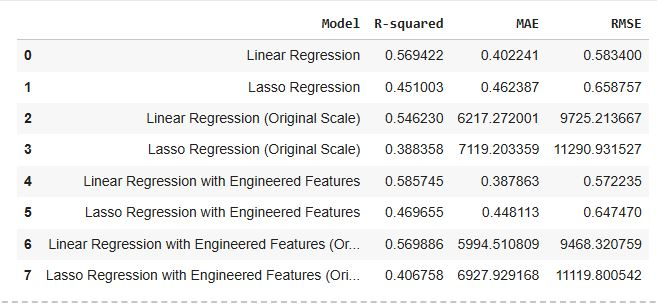

Lasso Coefficients (Key Price Drivers) for model without engineered features:
For this model, the features with non-zero coefficients indicating their importance were predominantly model, year, and odometer. (Specifically: model (positive), year (positive), odometer (negative)).

Lasso Coefficients (Key Price Drivers) for model with engineered features:
For this model, the features with non-zero coefficients were manufacturer_toyota (positive), type_sedan (positive), and manufacture_volkswagen (negative). This highlights the importance of specific manufacturers and car types, alongside usage.

6. Visualizations
Distribution of Price: Initial histogram showed a heavily right-skewed distribution, confirming some data cleanup. After removing outliers and log1p transformation, got much better distribution.
Actual vs. Predicted Plots (Log-Transformed): These plots showed a positive correlation, indicating that predictions generally followed the actual values, though with considerable scatter. The plots with all engineered features were generated with legends and distinct colors.
Actual vs. Predicted Plots (Original Scale): After inverse transformation, these plots revealed significant dispersion, with predictions far from the ideal y=x line, especially for higher prices. This visually confirmed the very low R-squared and high errors on the original price scale.
Residual Plots: For log-transformed predictions, these plots generally showed no strong patterns, though heteroscedasticity was observed, indicating varying error magnitudes across the prediction range.
7. Key Findings & Recommendations
Linear Models are Insufficient for Direct Price Prediction: Despite thorough data cleaning, transformation, and feature engineering, simple linear regression models struggle to accurately predict used car prices on the original dollar scale. While they show some predictive power on the log-transformed scale (R-squared up to 0.57 in initial models, and 0.22 after comprehensive FE), the error magnification during inverse transformation leads to poor performancefor real-world price estimates.
Lasso Highlights Key Price Drivers: The Lasso Regression models, through their ability to shrink less important coefficients to zero, identified specific features influencing price. In the initial model, model, year, and odometer were prominent. After adding more engineered features, manufacturer_toyota, type_sedan, and manufacturer_volkswagen emerged as key indicators.

Shift to Advanced, Non-Linear Models: Given the limitations of linear models, it is crucial to explore more sophisticated machine learning algorithms capable of handling non-linear relationships and complex interactions. Tree-based models (e.g., Random Forest, Gradient Boosting Machines like XGBoost or LightGBM) are highly recommended. These models can better leverage the binned and interaction features and potentially provide much more accurate price predictions on the original scale.
Refine Feature Engineering with Advanced Models: Once a more powerful model is chosen, re-evaluate feature engineering strategies to ensure they are optimally designed for the chosen model type. The current binned features might be more effective with tree-based models.
In conclusion, while we've identified some key price drivers through Lasso Regression, the current linear models are not robust enough for precise price prediction. Moving to advanced models and leveraging their ability to interpret complex features will be essential to provide actionable, data-driven insights for inventory management.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Used Car Price Prediction Report: What Drives the Price of a Car?

## Executive Summary

This report presents an analysis of a used car dataset to identify key factors influencing car prices and to develop a predictive model. Our goal is to provide actionable insights for used car dealerships to optimize their inventory and pricing strategies. We explored various data preparation techniques, engineered new features, and evaluated linear regression and Lasso regression models. While simple linear models show promise on log-transformed prices, they are insufficient for direct price prediction on the original scale. We recommend transitioning to more advanced, non-linear models for robust, real-world price estimates.



### Actionable Recommendations for Used Car Dealers:

1.  **Shift to Advanced Models for Pricing Accuracy:**
    *   **Recommendation:** Prioritize the adoption of more sophisticated machine learning algorithms for price prediction, specifically **tree-based models** such as Random Forest, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or even neural networks.
    *   **Rationale:** These models are better equipped to handle non-linear relationships, complex interactions between features, and the inherent variability in used car prices, offering potentially much higher accuracy on the original price scale.
2.  **Leverage Identified Price Drivers for Inventory Strategy:**
    *   **Recommendation:** Focus inventory acquisition on specific manufacturers and car types that command higher prices and have stronger demand.
    *   **Rationale:** The Lasso model with engineered features suggested `manufacturer_toyota` and `type_sedan` as positive price drivers. This implies these vehicles likely offer better resale value and appeal. Conversely, awareness of `manufacturer_volkswagen` having a negative impact can inform acquisition or pricing adjustments.
    *   **Practical Application:** For example, dealerships might prioritize acquiring well-maintained Toyota sedans, as they tend to hold value better.
3.  **Emphasize Vehicle Age and Mileage:**
    *   **Recommendation:** Continue to highlight `year` (car age) and `odometer` in marketing and pricing, as these are fundamental price drivers identified by the models.
    *   **Rationale:** Newer cars and those with lower mileage consistently fetch higher prices. Marketing efforts should emphasize these aspects.
    *   **Practical Application:** When appraising trade-ins, consider not just total mileage but also `mileage_per_year` as an indicator of usage patterns and potential wear.
4.  **Data-Driven Market Analysis:**
    *   **Recommendation:** Regularly update the model with new sales data and market trends.
    *   **Rationale:** The used car market is dynamic. Continuous retraining and validation will ensure the pricing model remains accurate and responsive to changes in demand, supply, and regional preferences (`region`, `state` were identified as high-cardinality features, implying their importance).

In conclusion, while our current linear models provide valuable insights into price drivers, achieving a highly accurate, deployable price prediction tool requires a transition to more advanced machine learning techniques. This will enable the dealership to better manage inventory, optimize pricing, and ultimately increase profitability.